In [2]:
from scipy.stats import binom
from scipy.stats import poisson
import pandas as pd
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import statsmodels.api as sm
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from scipy import stats
%matplotlib inline

Assignment 1
==

In [28]:
# a)
def F(x):
    y = (3/4)*x**2-(1/4)*x**3
    return y

F(0.5)

In [29]:
#a)
1-F(1)

In [30]:
# b)
x = sp.Symbol('x')
F = (3/4)*x**2-(1/4)*x**3
f = F.diff(x)
f

In [39]:
# c) Expected
sp.integrate(x*f, (x, 0 , 2))

In [40]:
# c) Variance
var = sp.integrate((x**2)*f, (x, 0 , 2))-sp.integrate(x*f, (x, 0 , 2))
var

Assignment 2
==

In [3]:
# a)
df = pd.DataFrame({'ICT':[102, 18, 120], 'C':[80, 20, 100], 'M':[36, 9, 45], 'GBE':[22, 13, 35], 'Total':[240, 60, 300]})
df = df.rename({0: 'Empl', 1:'Unempl', 2: 'Sum'})
df2 = df/300
display(df)
display(df2)

,ICT,C,M,GBE,Total
Empl,102,80,36,22,240
Unempl,18,20,9,13,60
Sum,120,100,45,35,300


,ICT,C,M,GBE,Total
Empl,0.34,0.266667,0.12,0.073333,0.8
Unempl,0.06,0.066667,0.03,0.043333,0.2
Sum,0.40,0.333333,0.15,0.116667,1.0


In [46]:
# b)
alpha = 0.05
obs = np.array([
    [102, 80, 36, 22],
    [18, 20, 9, 13]
    
])
stat, pvalue, dof, ex = stats.chi2_contingency(obs, correction=True)

if pvalue < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))
print(obs)
print('--------')
print (ex)

Reject since p-value = 0.0401 < 0.05
[[102  80  36  22]
 [ 18  20   9  13]]
--------
[[96. 80. 36. 28.]
 [24. 20.  9.  7.]]


In [50]:
# c)
c = 18/60
c

In [51]:
# d)
d = 13/60
d

In [53]:
# e)
# Compare P(ICT) and P(ICT |Unemployed)
e = 120/300
if c == e:
    print("Independent")
else:
    print("Dependent")

Dependent


Assignment 3
==

In [56]:
# a)
l = 2*2.1
poisson.sf(5, l)

In [58]:
# b)
l = 0.5*2.1
poisson.pmf(0, l)

In [59]:
# c) Exponential
k = 1000/2.1
k

In [60]:
stats.expon.sf(270, 0, k)

Assignment 4
==

In [5]:
# a)
Before = [30.5, 18.5, 24.5, 32, 16, 15, 23.5, 25.5, 28, 18]
After = [23, 21, 22, 28.5, 14.5, 15.5, 24.5, 21, 23.5, 16.5]

df = pd.DataFrame({'Before': Before,
                'After': After})
df['Difference'] = df['Before']- df['After']
meandiff = np.mean(df['Difference'])

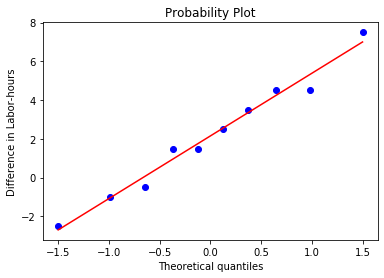

Skewness = 0.1328
Kurtosis = -0.7163


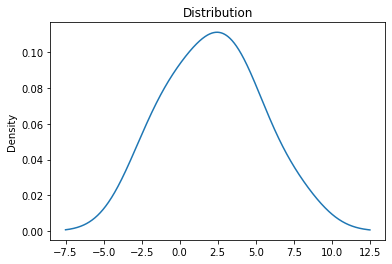

In [6]:
# We check for normality of the differences

stats.probplot(df['Difference'], plot=plt)
plt.ylabel('Difference in Labor-hours')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['Difference']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['Difference']),4)))
fig, ax = plt.subplots()
df['Difference'].plot.kde(ax=ax, legend=False, title='Distribution');

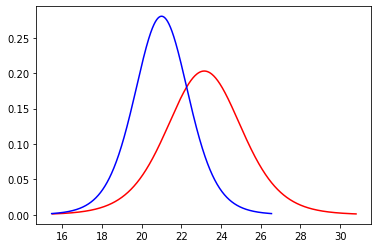

In [7]:
# Plotting
n1 = len(df['Before'])
SE1 = stats.sem(df['Before'])
mean1 = np.mean(df['Before'])

n2 = len(df['After'])
SE2 = stats.sem(df['After'])
mean2 = np.mean(df['After'])

x1 = np.linspace(mean1-4*SE1, mean1+4*SE1, 1000)
x2 = np.linspace(mean2-4*SE2, mean2+4*SE2, 1000)

y1 = stats.t.pdf(x1, n1-1, mean1, SE1)
y2 = stats.t.pdf(x2, n2-1, mean2, SE2)

plt.plot(x1,y1, color='red')
plt.plot(x2,y2, color='blue')

plt.show()

In [8]:
val = stats.ttest_rel(df['Before'], df['After'])

In [9]:
alpha = 0.05
stat = abs(round(val[0],2))
pvalue = round(val[1], 4)/2
crit = abs(round(stats.t.ppf(alpha,n1-1),2))
stat

In [10]:
# a)
if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))

Reject since 0.02485 < 0.05


In [67]:
# b) same p-value different alpha, so no.

Assignment 5
==

In [3]:
alg = 98
algs = 92
nonalgs = 136
nonalg = 254-alg

In [4]:
# a)
# Since we have two proportions, we can use test of difference between proportions:

val = sm.stats.proportions_ztest([algs, nonalgs], [alg, nonalg], value = None, alternative = 'larger')
stat = abs(round(val[0],2))
pvalue = round(val[1],4)

alpha = 0.05
crit = stats.norm.isf(alpha/2)

if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))

Reject since 0.0432 < 0.05


In [5]:
val[0]

In [74]:
# b) see other answers elsewhere

Assignment 6
==

In [81]:
df = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/New folder/assignment6_data.XLSX')

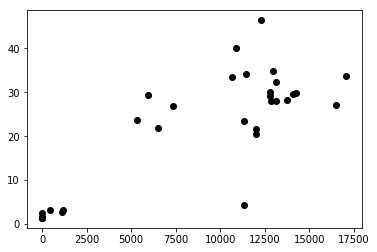

In [90]:
X = df['Unnamed: 2']
y = df['Unnamed: 1']
plt.scatter(X, y,  color='black');

In [91]:
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
res = model.resid
yhat = model.fittedvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unnamed: 1   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     58.63
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.92e-08
Time:                        14:45:20   Log-Likelihood:                -107.14
No. Observations:                  31   AIC:                             218.3
Df Residuals:                      29   BIC:                             221.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6291      2.652      1.745      0.092      -0.796      10.054
Unnamed: 2     0.0019      0.000      7.657      0.000       0.001       0.002
==============================================================================
Omnibus:                        3.065   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.010
Skew:                           0.000   Prob(JB):                        0.366
Kurtosis:                       4.248   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

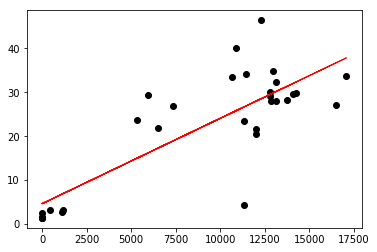

In [92]:
plt.scatter(X, y,  color='black')
plt.plot(X, yhat, color='red', linewidth=1);

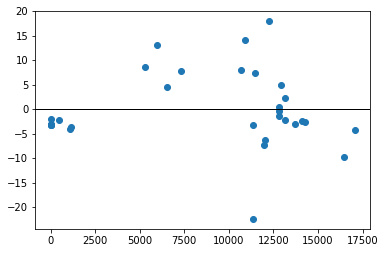

In [93]:
plt.scatter(X, res)
plt.axhline(y=0, color='k', linewidth=1)
plt.show()

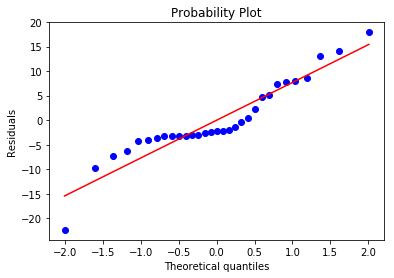

Skewness = 0.0004
Kurtosis = 1.2476


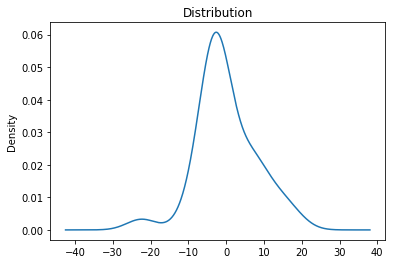

In [94]:
stats.probplot(res, plot=plt)
plt.ylabel('Residuals')
plt.show()
print('Skewness = ' + repr(round(stats.skew(res),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(res),4)))
df = pd.DataFrame(res)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');